In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [253]:
data = pd.read_csv("/Users/Shiva/Desktop/python/april/DS+-+Part2+-+Basketball.csv")

In [254]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [255]:
### The last row did not have any other detail except the tournament coulmn.  
### We can remove that to have a better analysis.
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [256]:
### Going to remove the last row.  The last team have participated in only one tournament.  

data.drop(labels =60, axis = 0, inplace = True)

In [257]:
### The check whether the last row is removed.
data.count()

Team                   60
Tournament             60
Score                  60
PlayedGames            60
WonGames               60
DrawnGames             60
LostGames              60
BasketScored           60
BasketGiven            60
TournamentChampion     60
Runner-up              60
TeamLaunch             60
HighestPositionHeld    60
dtype: int64

In [258]:
### info says that all the numerical columns are in object datatype.
### We have to convert them to int datatype before proceeding.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   60 non-null     object
 10  Runner-up            60 non-null     object
 11  TeamLaunch           60 non-null     object
 12  HighestPositionHeld  60 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.6+ KB


In [259]:
### Changing the numerical datatypes to int datatypes.
data = data.astype({"Score": int, "PlayedGames": int, "WonGames": int, "DrawnGames": int, "LostGames": int, "BasketScored": int, "BasketGiven": int})

In [260]:
data.shape

(60, 13)

In [261]:
data.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,20.000000


In [262]:
data[['Score', 'PlayedGames', 'WonGames', 'LostGames', 'BasketScored']].describe()

,Score,PlayedGames,WonGames,LostGames,BasketScored
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,916.450000,810.100000,309.033333,308.816667,1159.350000
std,1138.342899,877.465393,408.481395,294.508639,1512.063948
min,14.000000,30.000000,5.000000,15.000000,34.000000
25%,104.250000,115.500000,34.750000,62.750000,154.500000
50%,395.500000,424.500000,124.000000,197.500000,444.000000
75%,1360.500000,1345.500000,432.750000,563.500000,1669.750000
max,4385.000000,2762.000000,1647.000000,1070.000000,5947.000000


In [263]:
data.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [264]:
### TeamLaunch Year column is still an Object, we have to split the year 
### Then, we have to add an modified year column with an int datatype.

data['CleanedYearLaunched'] = data['TeamLaunch'].str[:4]
data = data.astype({"CleanedYearLaunched": int})
data.head()


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,CleanedYearLaunched
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1929
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,1929
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1929
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1931
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1929


In [265]:
### Checking which team has won maximum time

data[data['WonGames'] == data['WonGames'].max()]['Team']

0    Team 1
Name: Team, dtype: object

In [266]:
### Checking to see which team has played maximum number of games

data[data['PlayedGames'] == data['PlayedGames'].max()]['Team']

0    Team 1
1    Team 2
4    Team 5
Name: Team, dtype: object

In [267]:
### Creating a new column to know the value of combined(won game + drawn game)

dataCleaned['CombinedWonDrawnGames'] = dataCleaned['WonGames'] + dataCleaned['DrawnGames']

In [268]:
### Checking the column added.
dataCleaned.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,CombinedWonDrawnGames,CleanedYearLaunched,TeamsDivided
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,2199,1929,GoldWinners
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2154,1929,GoldWinners
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1839,1929,GoldWinners
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1803,1931,GoldWinners
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1842,1929,GoldWinners


In [272]:
### Checking for the teams who have lost games more than won and drawn games
### and going to remove them from the data

dataCleaned[dataCleaned['CombinedWonDrawnGames'] < dataCleaned['LostGames']]
dataCleaned.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,CombinedWonDrawnGames,CleanedYearLaunched,TeamsDivided
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,2199,1929,GoldWinners
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2154,1929,GoldWinners
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1839,1929,GoldWinners
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1803,1931,GoldWinners
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1842,1929,GoldWinners


In [274]:
### Dropped those teams whose combined(winning + drawn) matches is lower than the lost matches.
### And created a new cleaned table with all the required data.

dataCleaned = dataCleaned.drop(dataCleaned[dataCleaned['CombinedWonDrawnGames'] < dataCleaned['LostGames']].index)
dataCleaned.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,CombinedWonDrawnGames,CleanedYearLaunched,TeamsDivided
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,2199,1929,GoldWinners
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2154,1929,GoldWinners
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1839,1929,GoldWinners
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1803,1931,GoldWinners
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1842,1929,GoldWinners


<AxesSubplot:xlabel='PlayedGames', ylabel='WonGames'>

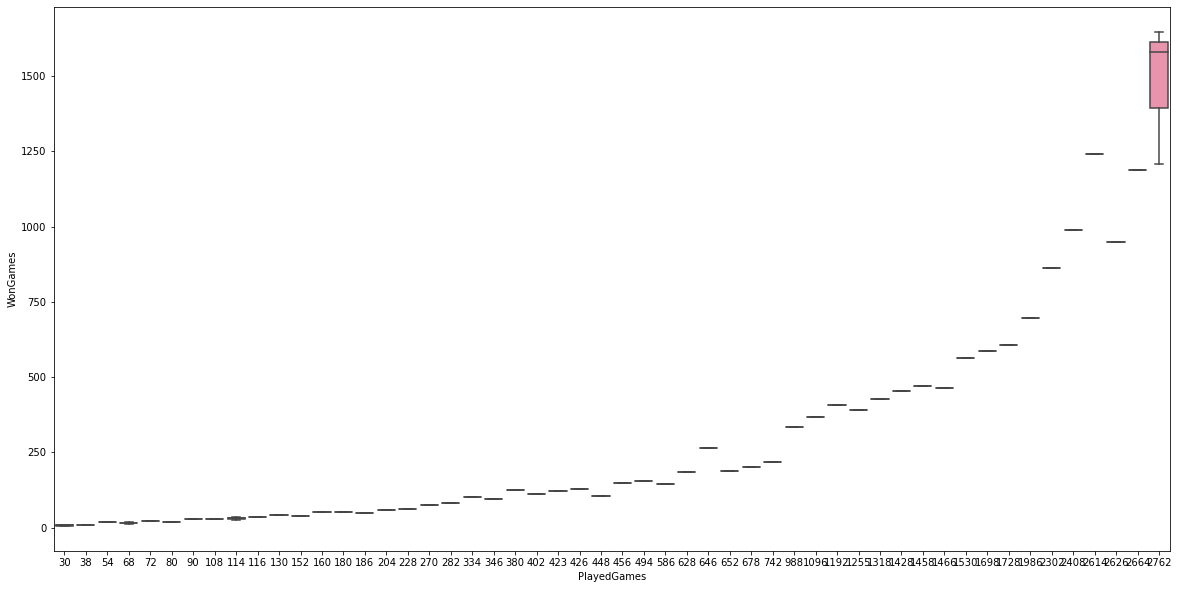

In [275]:
### This plot shows that the more games they played, the more the team's winning chance is.  
### So, we have taken the "number of games played" factor in our report.

import seaborn as sns
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x='PlayedGames', y = 'WonGames', data = data, ax=ax)

In [276]:
dataCleaned.corr()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,HighestPositionHeld,CombinedWonDrawnGames,CleanedYearLaunched
Tournament,1.000000,0.971607,0.998399,0.961583,0.982923,0.906296,0.966801,0.979808,-0.728388,0.986173,-0.653999
Score,0.971607,1.000000,0.970470,0.996926,0.935080,0.791069,0.996135,0.910674,-0.708286,0.996652,-0.569249
PlayedGames,0.998399,0.970470,1.000000,0.957362,0.989136,0.913985,0.961887,0.981980,-0.729639,0.985076,-0.634642
WonGames,0.961583,0.996926,0.957362,1.000000,0.913309,0.759270,0.999053,0.890790,-0.690068,0.992159,-0.574522
DrawnGames,0.982923,0.935080,0.989136,0.913309,1.000000,0.945011,0.918799,0.986307,-0.735008,0.957048,-0.625203
LostGames,0.906296,0.791069,0.913985,0.759270,0.945011,1.000000,0.771495,0.969377,-0.672814,0.830516,-0.638534
BasketScored,0.966801,0.996135,0.961887,0.999053,0.918799,0.771495,1.000000,0.900210,-0.688656,0.993169,-0.585872
BasketGiven,0.979808,0.910674,0.981980,0.890790,0.986307,0.969377,0.900210,1.000000,-0.726971,0.936816,-0.669590
HighestPositionHeld,-0.728388,-0.708286,-0.729639,-0.690068,-0.735008,-0.672814,-0.688656,-0.726971,1.000000,-0.716807,0.570707
CombinedWonDrawnGames,0.986173,0.996652,0.985076,0.992159,0.957048,0.830516,0.993169,0.936816,-0.716807,1.000000,-0.600855


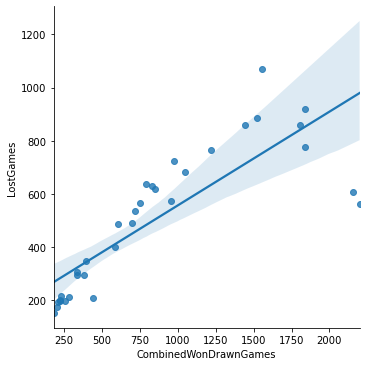

In [277]:
plot = sns.lmplot(x='CombinedWonDrawnGames', y='LostGames', data=dataCleaned)

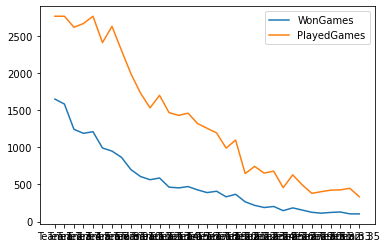

In [278]:
plt.plot(dataCleaned['Team'], dataCleaned['WonGames'])
plt.plot(dataCleaned['Team'], dataCleaned['PlayedGames'])
plt.legend(['WonGames', 'PlayedGames'])
plt.show()

<AxesSubplot:xlabel='Team', ylabel='CombinedWonDrawnGames'>

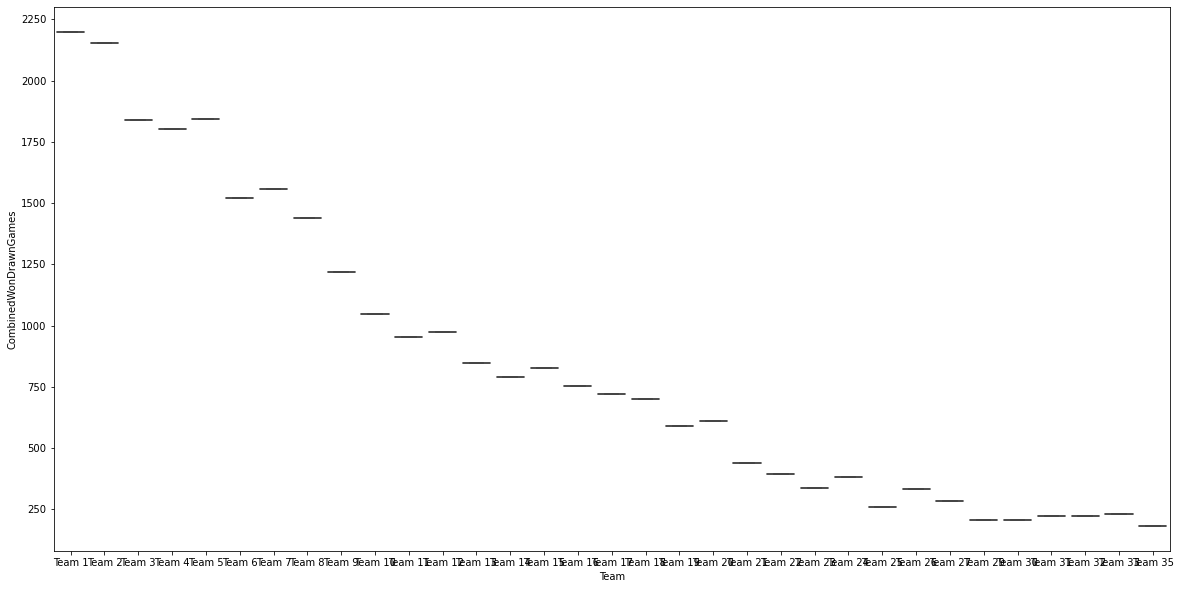

In [279]:
### Checking the relationship between Team and the won/draw games

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x='Team',y='CombinedWonDrawnGames',data=dataCleaned, ax=ax)

<AxesSubplot:xlabel='Team', ylabel='CleanedYearLaunched'>

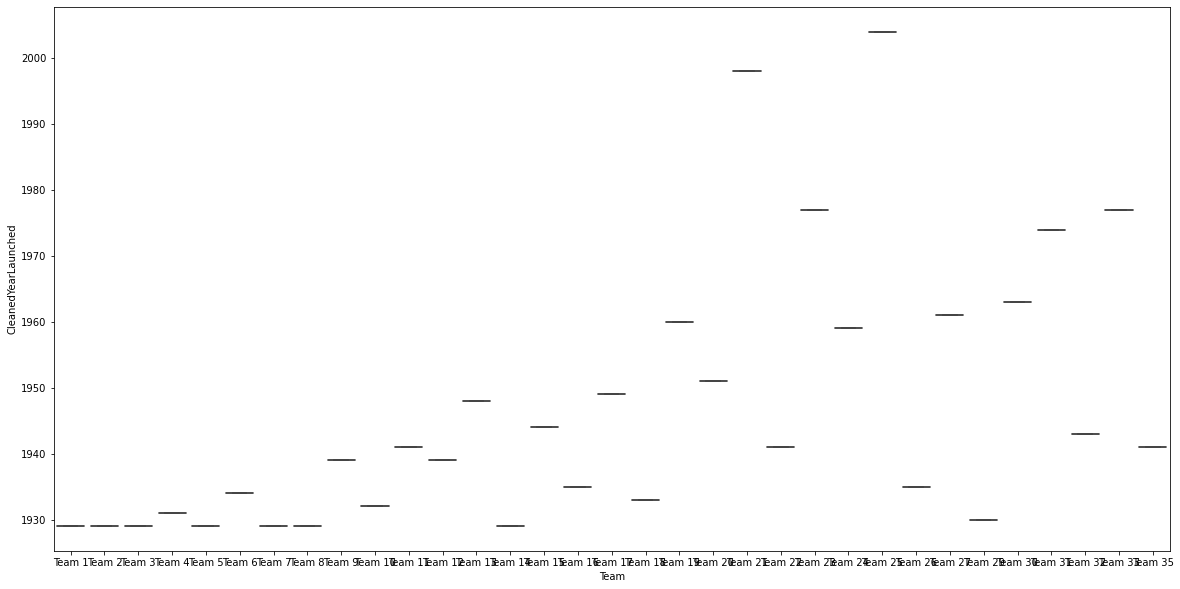

In [280]:
###Since the question suggests that some of the older teams might have been hired already,
###we are going to plot a graph with year basis
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Team',y='CleanedYearLaunched',data=dataCleaned, ax=ax)

In [281]:
### Creating a function to have a division between the teams

def teams_division(x):
    CombinedWonDrawnGames = x 
    if CombinedWonDrawnGames > 0  and CombinedWonDrawnGames <= 200:
        return 'budding_team'
    if CombinedWonDrawnGames > 200 and CombinedWonDrawnGames <= 500:
        return 'winners'
    elif CombinedWonDrawnGames > 500 and CombinedWonDrawnGames<= 1000:
        return 'silverWinners'
    elif CombinedWonDrawnGames > 1000 and CombinedWonDrawnGames <= 1500:
        return 'SuperWinners'
    elif ((CombinedWonDrawnGames >1500) and (CombinedWonDrawnGames <= 3000)):
        return 'GoldWinners'    
    else:   
        pass

In [282]:
### the division function have been applied to the data.

dataCleaned['TeamsDivided'] = dataCleaned['CombinedWonDrawnGames'].apply(teams_division)
dataCleaned.head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,CombinedWonDrawnGames,CleanedYearLaunched,TeamsDivided
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,2199,1929,GoldWinners
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2154,1929,GoldWinners
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1839,1929,GoldWinners
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1803,1931,GoldWinners
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1842,1929,GoldWinners
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1,1521,1934,GoldWinners
6,Team 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3,1556,1929,GoldWinners
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,1441,1929,SuperWinners
8,Team 9,58,2109,1986,698,522,766,2683,2847,-,1,1939-40,2,1220,1939,SuperWinners
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,-,1932-33,1,1046,1932,SuperWinners


In [283]:
dataCleaned.sort_values(by=['TeamsDivided', 'CleanedYearLaunched'], ascending=[True, True]).head(15)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,CombinedWonDrawnGames,CleanedYearLaunched,TeamsDivided
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,2199,1929,GoldWinners
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,2154,1929,GoldWinners
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1839,1929,GoldWinners
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1842,1929,GoldWinners
6,Team 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3,1556,1929,GoldWinners
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1803,1931,GoldWinners
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1,1521,1934,GoldWinners
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,1441,1929,SuperWinners
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,-,1932-33,1,1046,1932,SuperWinners
8,Team 9,58,2109,1986,698,522,766,2683,2847,-,1,1939-40,2,1220,1939,SuperWinners


In [284]:
dataCleaned.groupby("TeamsDivided")["CleanedYearLaunched"].agg("count")

TeamsDivided
GoldWinners       7
SuperWinners      3
budding_team      1
silverWinners    10
winners          12
Name: CleanedYearLaunched, dtype: int64

In [285]:
pd.crosstab(dataCleaned['TeamsDivided'], dataCleaned['CleanedYearLaunched'])

CleanedYearLaunched,1929,1930,1931,1932,1933,1934,1935,1939,1941,1943,...,1949,1951,1959,1960,1961,1963,1974,1977,1998,2004
TeamsDivided,,,,,,,,,,,,,,,,,,,,,
GoldWinners,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SuperWinners,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
budding_team,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
silverWinners,1,0,0,0,1,0,1,1,1,0,...,1,1,0,1,0,0,0,0,0,0
winners,0,1,0,0,0,0,1,0,1,1,...,0,0,1,0,1,1,1,2,1,1


In [286]:
dataCleaned['TeamsDivided'].value_counts()

winners          12
silverWinners    10
GoldWinners       7
SuperWinners      3
budding_team      1
Name: TeamsDivided, dtype: int64

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TeamsDivided', ylabel='count'>

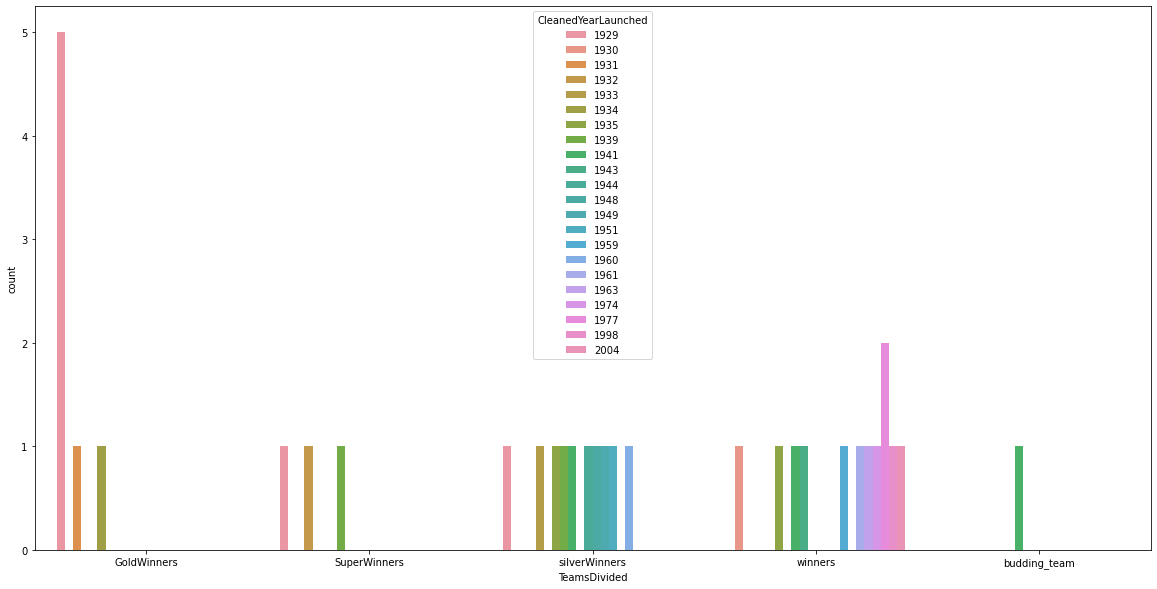

In [287]:

### GoldWinners might have been already hired.  
### Suggesting to look into the teams in GoldWinners, if they are not yet hired.  

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('TeamsDivided',data=dataCleaned,hue='CleanedYearLaunched', ax =ax)



In [ ]:
### Suggesting to select a team from the GoldWinners if they are not already hired by other companies.  